<a href="https://colab.research.google.com/github/vasiliyeskin/Deep-Reinforcement-Learning-Hands-On/blob/master/Chapter02/lunarSimulationOnColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import gym

In [7]:
if __name__ == "__main__":
    env = gym.make("CartPole-v0")

    total_reward = 0.0
    total_steps = 0
    obs = env.reset()

    while True:
        action = env.action_space.sample()
        obs, reward, done, _ = env.step(action)
        total_reward += reward
        total_steps += 1
        if done:
            break

    print("Episode done in %d steps, total reward %.2f" % (total_steps, total_reward))

Episode done in 18 steps, total reward 18.00


In [5]:
import gym
import random

class RandomActionWrapper(gym.ActionWrapper):
    def __init__(self, env, epsilon=0.1):
        super(RandomActionWrapper, self).__init__(env)
        self.epsilon = epsilon

    def action(self, action):
        if random.random() < self.epsilon:
            print("Random!")
            return self.env.action_space.sample()
        return action


if __name__ == "__main__":
    env = RandomActionWrapper(gym.make("CartPole-v0"))

    obs = env.reset()
    total_reward = 0.0

    while True:
        obs, reward, done, _ = env.step(0)
        total_reward += reward
        if done:
            break

    print("Reward got: %.2f" % total_reward)

Random!
Reward got: 9.00


In [ ]:
!pip3 freeze

In [32]:
# install required system dependencies
!apt-get install -y xvfb x11-utils
# install required python dependencies (might need to install additional gym extras depending)
!pip install gym[box2d]==0.17.* pyvirtualdisplay==0.2.* PyOpenGL==3.1.* PyOpenGL-accelerate==3.1.*

Reading package lists... Done
Building dependency tree       
Reading state information... Done
x11-utils is already the newest version (7.7+3build1).
xvfb is already the newest version (2:1.19.6-1ubuntu4.4).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
     |████████████████████████████████| 542kB 4.0MB/s 
     |████████████████████████████████| 450kB 13.3MB/s 
  Created wheel for PyOpenGL-accelerate: filename=PyOpenGL_accelerate-3.1.5-cp36-cp36m-linux_x86_64.whl size=1593657 sha256=961a6480dcf9ab4ac9b82ee82b11b847235b334713e9733ace50928d50b8dfde
  Stored in directory: /root/.cache/pip/wheels/bd/21/77/99670ceca25fddb3c2b60a7ae44644b8253d1006e8ec417bcc
Successfully built PyOpenGL-accelerate


In [ ]:
!xvfb-run -a jupyter notebook

In [ ]:
# Install and configure X window with virtual screen
!sudo apt-get install xserver-xorg libglu1-mesa-dev freeglut3-dev mesa-common-dev libxmu-dev libxi-dev
# Run the virtual screen in the background (:0)
!sudo /usr/bin/X :0 &
# We only need to setup the virtual screen once
# Run the program with vitural screen
!DISPLAY=:0
# If you dont want to type 'DISPLAY=:0' everytime
# !export DISPLAY=:0

In [33]:
import gym

if __name__ == "__main__":
    env = gym.make("CartPole-v0")
    env = gym.wrappers.Monitor(env, "recording", force=True)

    total_reward = 0.0
    total_steps = 0
    obs = env.reset()

    while True:
        action = env.action_space.sample()
        obs, reward, done, _ = env.step(action)
        total_reward += reward
        total_steps += 1
        if done:
            break

    print("Episode done in %d steps, total reward %.2f" % (total_steps, total_reward))
    env.close()
    env.env.close()

NameError: ignored

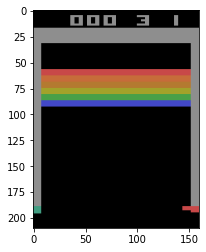

In [ ]:
import gym
from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

env = gym.make('Breakout-v0')
env.reset()
for _ in range(100):
    plt.imshow(env.render(mode='rgb_array'))
    display.display(plt.gcf())
    display.clear_output(wait=True)
    action = env.action_space.sample()
    env.step(action)

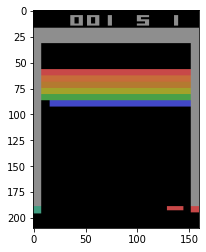

In [8]:
import gym
from IPython import display
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

env = gym.make('Breakout-v0')
env.reset()
img = plt.imshow(env.render(mode='rgb_array')) # only call this once
for _ in range(100):
    img.set_data(env.render(mode='rgb_array')) # just update the data
    display.display(plt.gcf())
    display.clear_output(wait=True)
    action = env.action_space.sample()
    env.step(action)